In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
clean_df=pd.read_csv(r'clean_crime_data.csv', low_memory=False)
clean_df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,PremiseType,Total_Incidents,Year,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,STREET,1,2023,4,15,105,15,Saturday,5,11
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,GAS STATION,1,2023,4,15,105,15,Saturday,5,21
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,STREET,1,2023,4,15,105,15,Saturday,5,17
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,STREET,1,2023,4,15,105,15,Saturday,5,21
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,DRUG STORE / MED BL,1,2023,4,11,101,15,Tuesday,1,9


In [3]:
clean_df.shape

(454293, 21)

In [4]:
clean_df.isnull().sum()

CrimeDateTime      0
Description        0
Inside_Outside     0
Weapon             0
Gender             0
Age                0
Race               0
Old_District       0
Neighborhood       0
Latitude           0
Longitude          0
PremiseType        0
Total_Incidents    0
Year               0
Month              0
day_of_month       0
day_of_year        0
week_of_year       0
dayname_of_week    0
day_of_week        0
Hour               0
dtype: int64

PROJECT GOALS:
* Identify and analyze the crime trends through the years in Baltimore 
* Examining the variations in crime trends based on month and day.
* Which hour of the day has the most crime?
* Finding the high-crime area.
* Analyzing the crime in a district based on the crime categories. 

#### CRIME RATE PER YEAR

In [5]:
crimes_per_year=clean_df.groupby('Year')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_year=crimes_per_year.rename(columns={"count": "# of crimes"})
crimes_per_year

,Year,# of crimes
0,2013,46601
1,2014,44204
2,2015,46844
3,2016,46967
4,2017,41430
5,2018,39479
6,2019,37345
7,2020,28930
8,2021,32849
9,2022,40270


Text(0.5, 1.0, 'crimes since 2013')

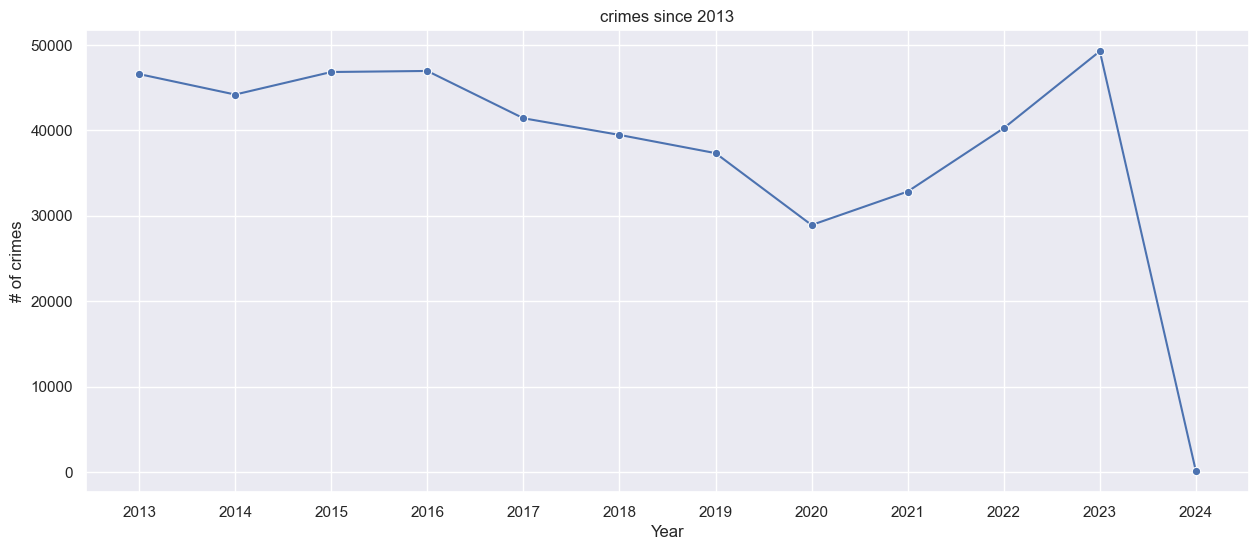

In [6]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_year, x='Year', y='# of crimes', marker='o')
plt.xlabel("Year")
plt.xticks(range(2013,2025))
plt.ylabel("# of crimes")
plt.title("crimes since 2013")

The crime was higher in the year 2023 followed by 2016. 2024 has the least as the data is available only for the 2 months currently. Comparitively, there was a lesser crime in 2020 followed by 2021.

#### CRIME RATE PER MONTH

In [7]:
crimes_per_month=clean_df.groupby('Month')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_month= crimes_per_month.rename(columns={"count": "# of crimes"})
crimes_per_month

,Month,# of crimes
0,1,33047
1,2,29152
2,3,33654
3,4,35440
4,5,39840
5,6,40615
6,7,41641
7,8,41986
8,9,41074
9,10,42602


Text(0.5, 1.0, 'Crimes by Month')

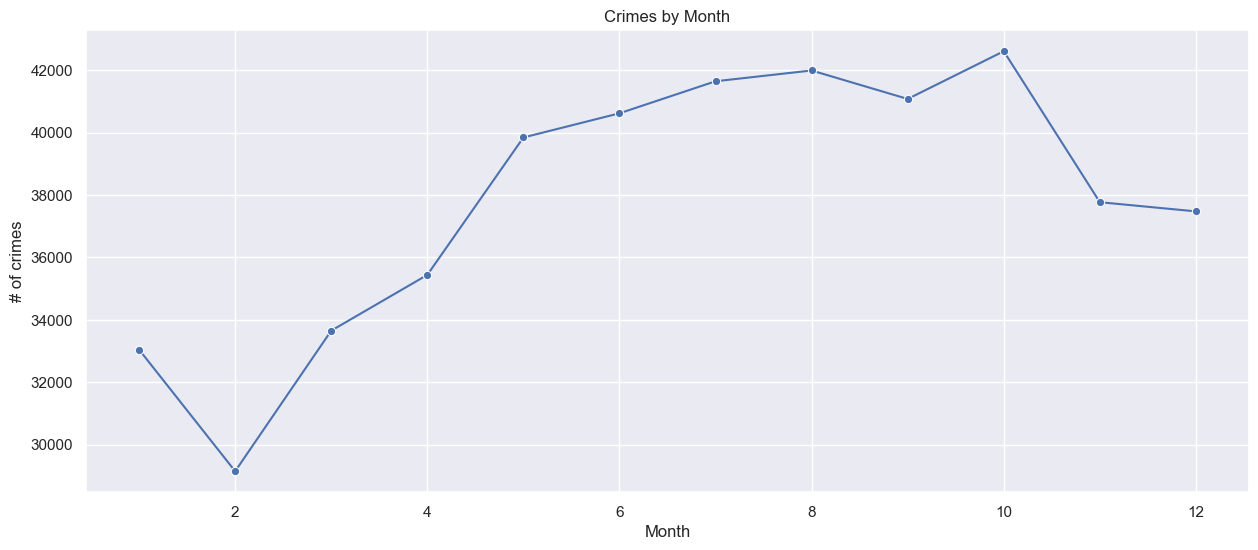

In [8]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_month, x='Month', y='# of crimes', marker='o')
plt.xlabel("Month")
plt.ylabel("# of crimes")
plt.title("Crimes by Month")

October follwed by August has the highest crime rate where as february has the least crime.

#### CRIME PER DAY IN A WEEK

In [9]:
crimes_per_day=clean_df.groupby('dayname_of_week')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_day= crimes_per_day.rename(columns={"count": "# of crimes"})
crimes_per_day

,dayname_of_week,# of crimes
0,Friday,67784
1,Monday,66039
2,Saturday,65067
3,Sunday,63615
4,Thursday,63225
5,Tuesday,64568
6,Wednesday,63995


In [10]:
crimes_per_day.columns

Index(['dayname_of_week', '# of crimes'], dtype='object')

Text(0.5, 1.0, 'Crimes by Day in a week')

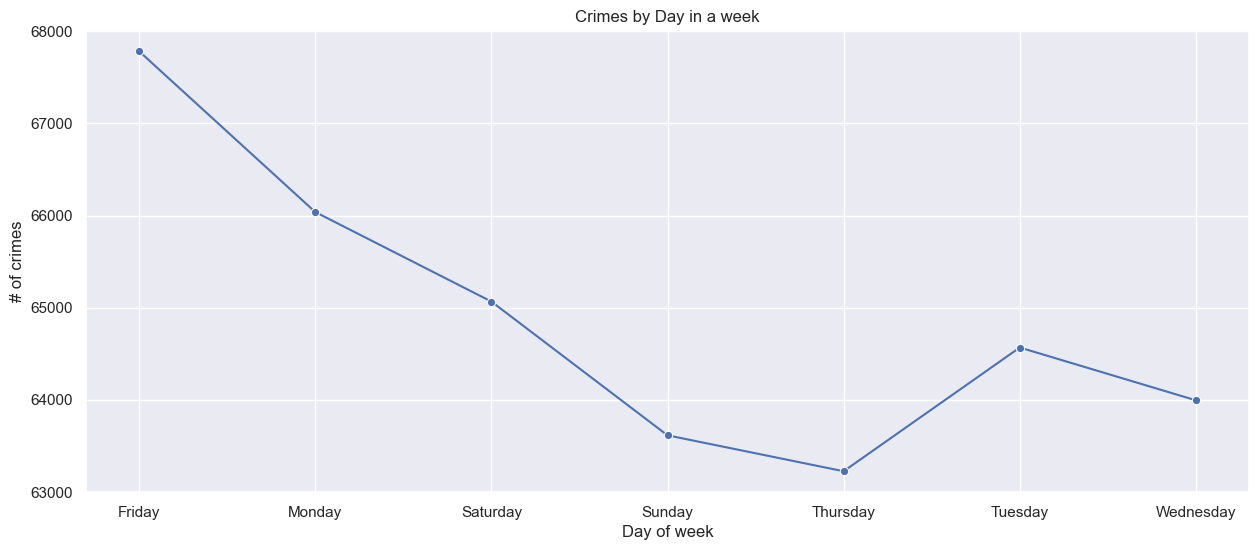

In [11]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_day, x='dayname_of_week', y='# of crimes', marker='o')
plt.xlabel("Day of week")
plt.ylabel("# of crimes")
plt.title("Crimes by Day in a week")

Fromt he above graph, we can say that Friday has the highest crime where thursday followed by sunday has the least crime.

#### CRIME RATE BY TIME 

In [12]:
crimes_by_time_in_day=clean_df.groupby('Hour')['Total_Incidents'].agg(['count']).reset_index()
crimes_by_time_in_day= crimes_by_time_in_day.rename(columns={"count": "# of crimes"})
crimes_by_time_in_day

,Hour,# of crimes
0,0,23249
1,1,17543
2,2,13920
3,3,10382
4,4,8338
5,5,7255
6,6,7937
7,7,11401
8,8,14668
9,9,15611


Text(0.5, 1.0, 'Crimes over time in the day')

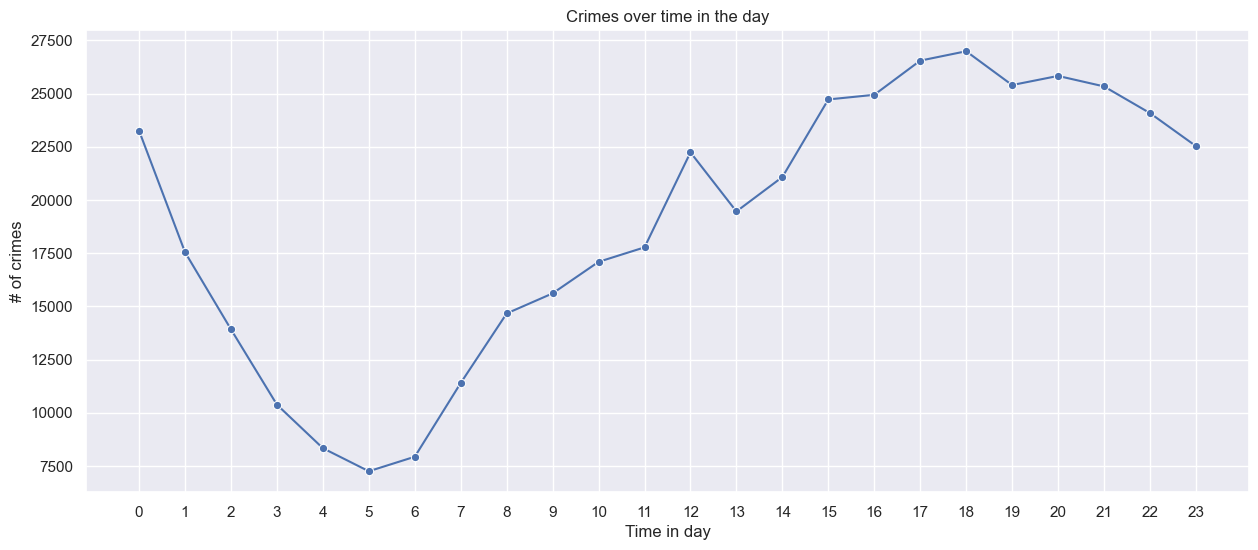

In [13]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_by_time_in_day, x='Hour', y='# of crimes', marker='o')
plt.xlabel("Time in day")
plt.ylabel("# of crimes")
plt.xticks(range(0,24))
plt.title("Crimes over time in the day")

There is a high crime occurrance between 5 PM and 6 PM in a day and the least between 4 AM and 5 AM

In [14]:
#crime_df_clean_copy=crime_df_clean.copy()

In [15]:
#crime rate based on crime category
crime_types=clean_df.Description.value_counts()
crime_by_category=crime_types.to_frame()
crime_by_category

,count
Description,
LARCENY,98695
COMMON ASSAULT,81454
BURGLARY,59699
AGG. ASSAULT,53133
LARCENY FROM AUTO,52530
AUTO THEFT,47542
ROBBERY,36496
SHOOTING,6603
ROBBERY - COMMERCIAL,5791


#### CRIME RATE BY CRIME TYPE

<Axes: title={'center': 'Crime Type'}, xlabel='Description', ylabel='count'>

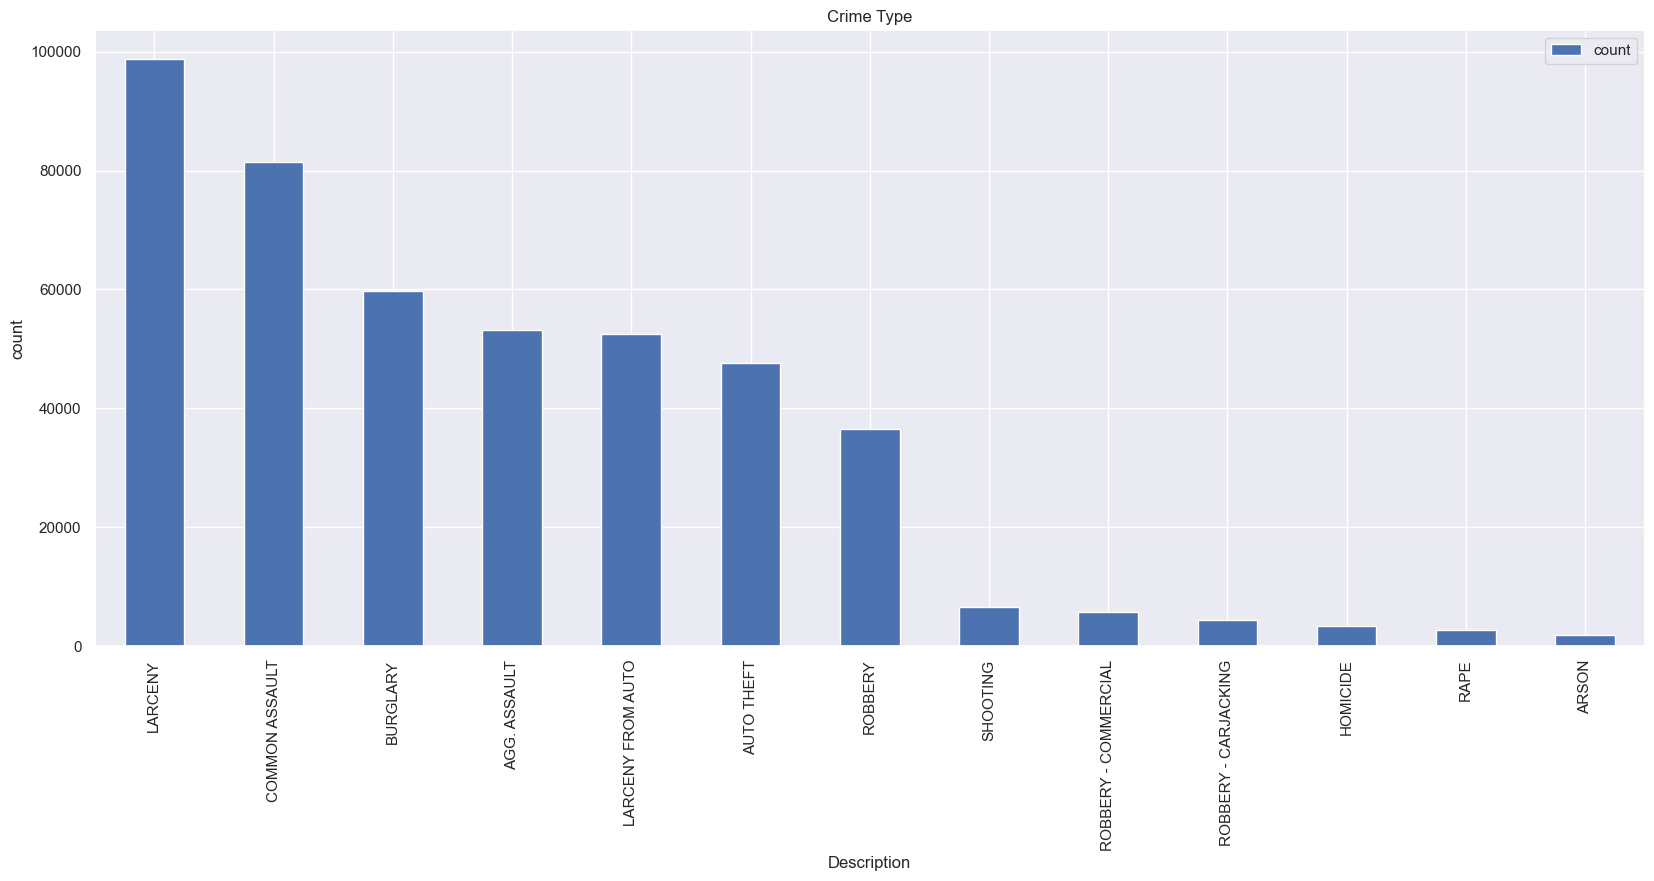

In [16]:
crime_by_category.plot(kind='bar',figsize=(20,8), xlabel="Description",ylabel="count", title="Crime Type")

#### CRIME RATE BY DISTRICT

In [17]:
a=clean_df.Old_District.value_counts()
crime_by_district=a.to_frame()
crime_by_district

,count
Old_District,
NORTHEAST,64158
SOUTHEAST,58417
SOUTHERN,48504
CENTRAL,48403
NORTHERN,45782
SOUTHWEST,43697
NORTHWEST,43522
EASTERN,37134
WESTERN,34310


<Axes: title={'center': 'Crime per District'}, xlabel='Old_District', ylabel='count'>

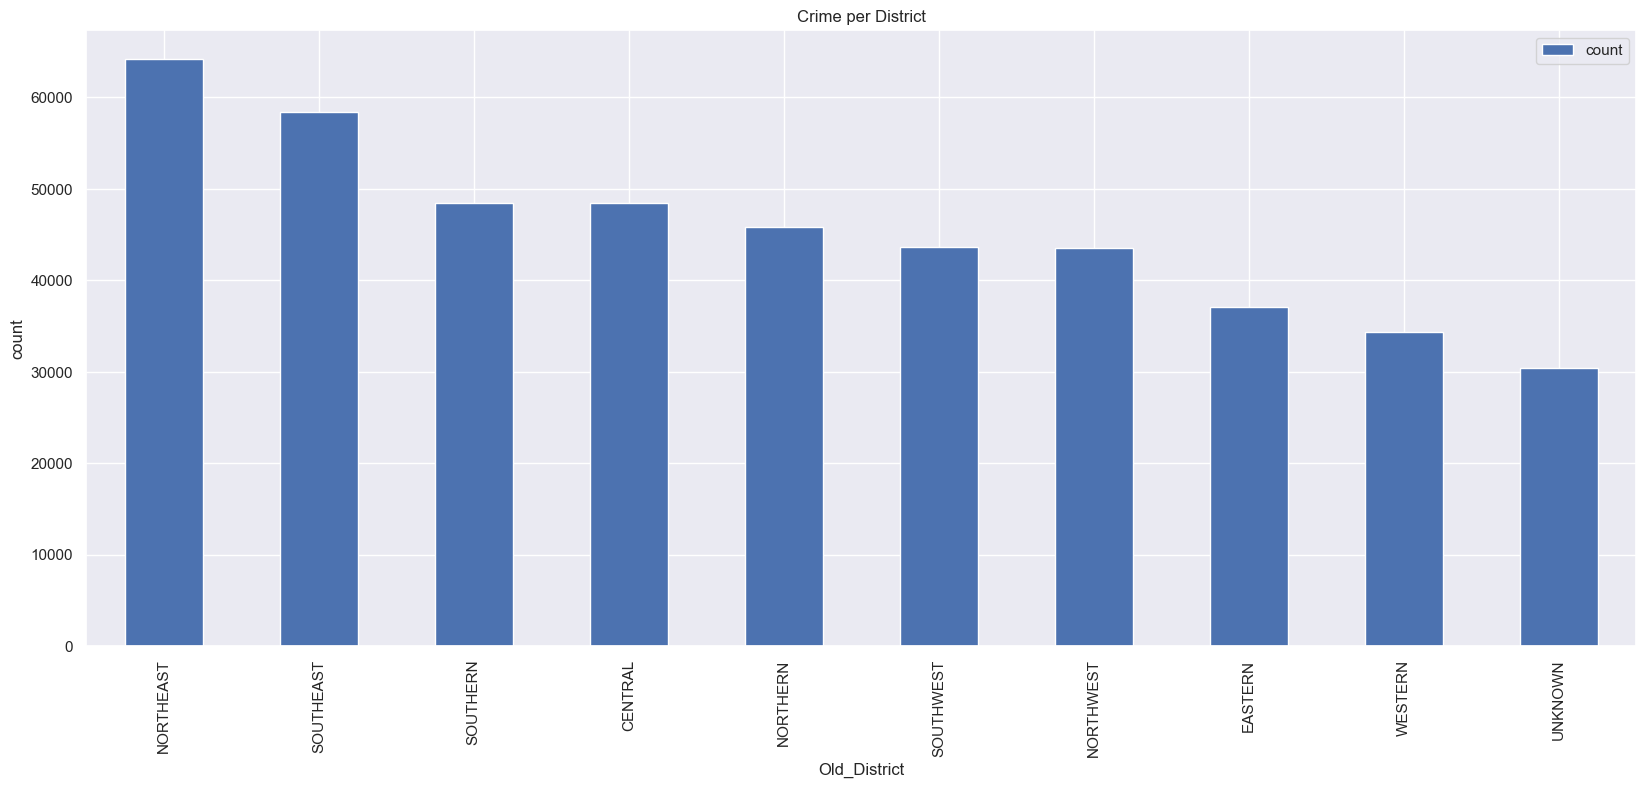

In [18]:
crime_by_district.plot(kind='bar',figsize=(20,8), xlabel="Old_District",ylabel="count", title= "Crime per District")

#### CRIME RATE BY DISTRICT AND CRIME TYPE

In [35]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from IPython.display import display

district_dropdown = widgets.Dropdown(options=sorted(clean_df['Old_District'].unique()), value=clean_df['Old_District'].unique()[0], description='District')
#crime_dropdown = widgets.Dropdown(options=filtered_crime_df['Description'].unique(), value=filtered_crime_df['Description'].unique()[0], description='Crime Category')

#display(widgets.HBox([year_dropdown, crime_dropdown]))
def district_category_crime(district):
    sns.set(rc={'figure.figsize':(15,6)})
    data=clean_df[(clean_df['Old_District'] == district)]
    data=data.Description.value_counts()
    current_data=data.to_frame()
    #current_data
    #print(current_data.columns)
    current_data.plot(kind='bar',figsize=(20,8), xlabel="Description",ylabel="# of crimes", title=f" crime rate in {district}")
    
interact(district_category_crime, district=district_dropdown)

interactive(children=(Dropdown(description='District', index=3, options=('CENTRAL', 'EASTERN', 'NORTHEAST', 'N…

<function __main__.district_category_crime(district)>

#### CRIME RATE BY DISTRICT AND PREMISE TYPE

In [20]:
district_dropdown = widgets.Dropdown(options=sorted(clean_df['Old_District'].unique()), value=clean_df['Old_District'].unique()[0], description='District')
#crime_dropdown = widgets.Dropdown(options=filtered_crime_df['Description'].unique(), value=filtered_crime_df['Description'].unique()[0], description='Crime Category')

#display(widgets.HBox([year_dropdown, crime_dropdown]))
def district_category_crime(district):
    sns.set(rc={'figure.figsize':(15,6)})
    data=clean_df[(clean_df['Old_District'] == district)]
    data=data.PremiseType.value_counts()
    current_data=data.to_frame()
    current_data=current_data.head(10)
    #current_data
    #print(current_data.columns)
    current_data.plot(kind='bar',figsize=(20,8), xlabel="PremiseType",ylabel="# of crimes", title=f" crime rate in {district}")
    
interact(district_category_crime, district=district_dropdown)

interactive(children=(Dropdown(description='District', index=3, options=('CENTRAL', 'EASTERN', 'NORTHEAST', 'N…

<function __main__.district_category_crime(district)>

#### CRIME RATE PER GENDER

In [21]:
crime_by_gender=clean_df.groupby('Gender')['Total_Incidents'].agg(['count']).reset_index()

In [22]:
crime_by_gender.columns

Index(['Gender', 'count'], dtype='object')

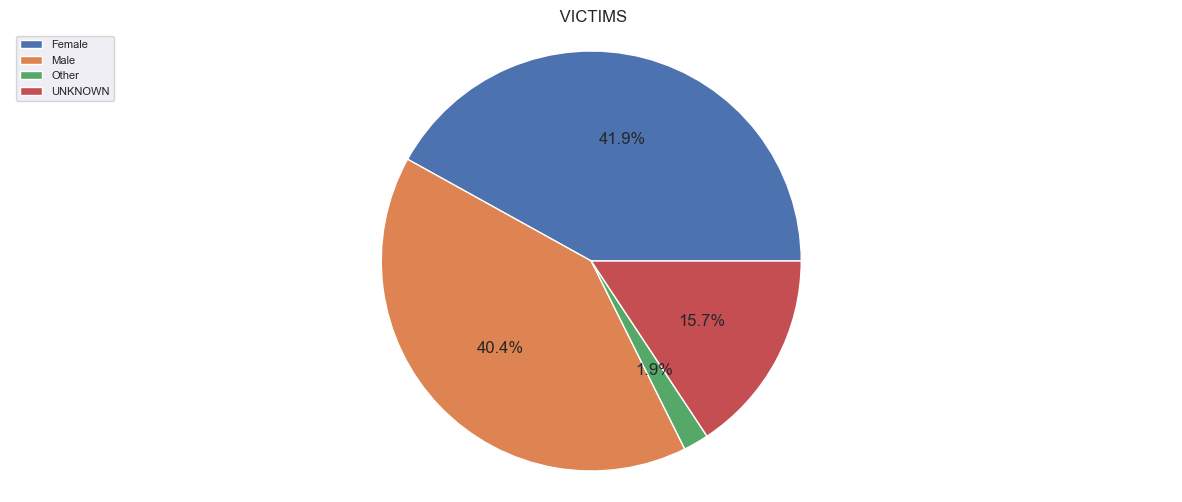

In [23]:
plt.figure(figsize=(15,6))
plt.pie(crime_by_gender['count'], startangle=0,autopct='%1.1f%%')
plt.legend(labels=crime_by_gender['Gender'], loc='upper left',prop={'size':8})
plt.axis('equal')
plt.title(" VICTIMS")
plt.show()

#### CRIME RATE BY WEAPON

In [24]:
clean_df.Weapon.unique()

array(['UNKNOWN', 'HANDGUN', 'PERSONAL_WEAPONS', 'AUTOMATIC_HANDGUN',
       'BLUNT_OBJECT', 'FIREARM', 'KNIFE_CUTTING_INSTRUMENT',
       'MOTOR_VEHICLE_VESSEL', 'KNIFE', 'OTHER', 'HANDS', 'RIFLE', 'FIRE',
       'ASPHYXIATION', 'AUTOMATIC_FIREARM', 'OTHER_FIREARM', 'POISON',
       'SHOTGUN', 'AUTOMATIC_RIFLE', 'FIRE_INCENDIARY_DEVICE',
       'EXPLOSIVES', 'AUTOMATIC_SHOTGUN',
       'DRUGS_NARCOTICS_SLEEPING_PILLS'], dtype=object)

In [25]:
weapon_series=clean_df.Weapon.value_counts()

In [26]:
weapon_series

Weapon
UNKNOWN                           334579
FIREARM                            37284
PERSONAL_WEAPONS                   29504
OTHER                              21959
KNIFE                              11735
HANDGUN                             6348
HANDS                               4739
KNIFE_CUTTING_INSTRUMENT            3244
BLUNT_OBJECT                        2174
FIRE                                1519
MOTOR_VEHICLE_VESSEL                 458
AUTOMATIC_HANDGUN                    127
ASPHYXIATION                         126
OTHER_FIREARM                        115
RIFLE                                112
SHOTGUN                               77
FIRE_INCENDIARY_DEVICE                74
AUTOMATIC_FIREARM                     61
POISON                                29
AUTOMATIC_RIFLE                       17
DRUGS_NARCOTICS_SLEEPING_PILLS         5
EXPLOSIVES                             4
AUTOMATIC_SHOTGUN                      3
Name: count, dtype: int64

In [27]:
weapons_df=weapon_series.to_frame().reset_index()

In [28]:
weapons_df.columns

Index(['Weapon', 'count'], dtype='object')

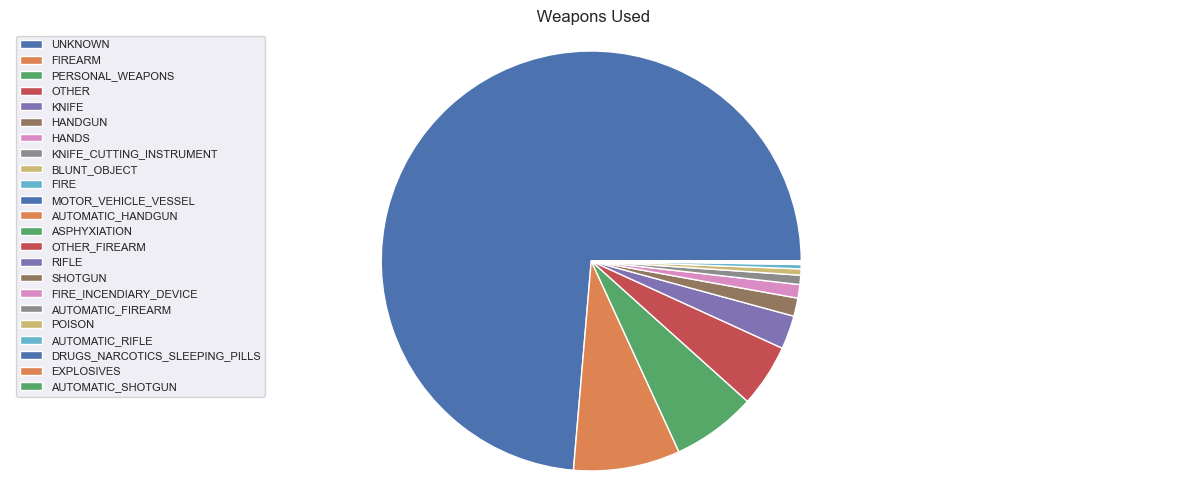

In [29]:
plt.figure(figsize=(15,6))
plt.pie(weapons_df['count'], startangle=0)
plt.legend(labels=weapons_df['Weapon'], loc='upper left',prop={'size':8})
plt.axis('equal')
plt.title(" Weapons Used")
plt.show()

#### WORDCLOUD FOR PREMISE TYPE

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

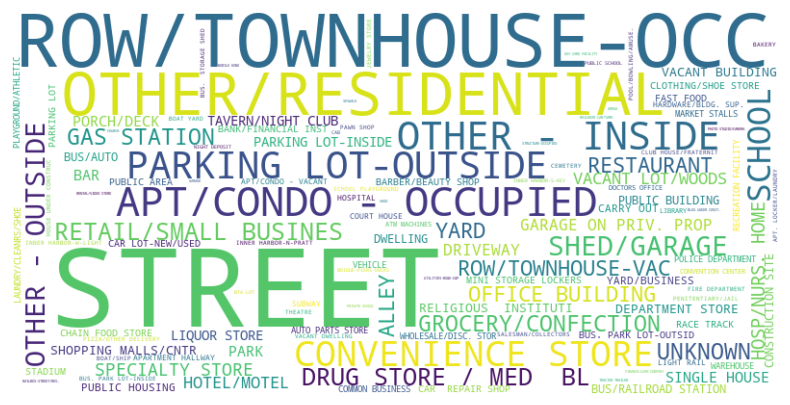

In [31]:
premise_type_counts = clean_df['PremiseType'].value_counts()
premise_type_counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(premise_type_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()